In [69]:
import json
import numpy as np

results = []
for iteration in range(100):
    with open("testing/overview_{}.json".format(iteration), mode = "r", encoding = "utf-8") as f:
        result = json.load(f)
        results.append(result)

# Errorneous simulation

In [78]:
import pandas as pd

last_error = []
last_claimed = []
for result in results:
    compare = []
    for party in result["result_party"]:
        tmp = dict()
        tmp["partyName"] = party["partyName"]
        tmp["gainedSeats95"] = party["gainedSeats"]
        compare.append(tmp)
    compare_2 = dict()
    for province in result["result_const"]:
        constituencies = province["constituencies"]
        for constituency in constituencies:
            rank = sorted(constituency["candidates"], key = lambda x: x["votes"], reverse = True)
            if (rank[0]["votes"] - rank[1]["votes"]) > constituency["turnOut"] * (100/95 - 1):
                try: compare_2[rank[0]["partyName"]] += 1
                except: compare_2[rank[0]["partyName"]] = 1
    final = pd.DataFrame(compare).merge(pd.DataFrame(pd.Series(compare_2)).reset_index(), left_on = "partyName", right_on = "index")
    final["error"] = final["gainedSeats95"] - final[0]
    final = final[["partyName", "error"]]
    if type(last_error) == list:
        last_error = final
    else: 
        last_error = last_error.merge(final, on = "partyName")
    
    calculate_partylist = []
    for party in result["result_party"]:
        tmp = dict()
        tmp["partyName"] = party["partyName"]
        tmp["partyVote"] = party["partyVote"]
        calculate_partylist.append(tmp)
    
    party_list_calc = pd.DataFrame(calculate_partylist)
    party_list_calc["seatsClaimed"] = np.floor(
        party_list_calc["partyVote"] / ((result["turnOut"] * (100/95 - 1)) + result["validVotes_partyList"]) * 100
    ).astype(int)
    party_list_calc = party_list_calc[["partyName", "seatsClaimed"]]
    if type(last_claimed) == list:
        last_claimed = party_list_calc
    else:
        last_claimed = last_claimed.merge(party_list_calc, on = "partyName")

C:\Users\kittapat.ra\AppData\Local\Temp\ipykernel_27640\281109826.py:26: FutureWarning: Passing 'suffixes' which cause duplicate columns {'error_x'} in the result is deprecated and will raise a MergeError in a future version.
  last_error = last_error.merge(final, on = "partyName")
C:\Users\kittapat.ra\AppData\Local\Temp\ipykernel_27640\281109826.py:43: FutureWarning: Passing 'suffixes' which cause duplicate columns {'seatsClaimed_x'} in the result is deprecated and will raise a MergeError in a future version.
  last_claimed = last_claimed.merge(party_list_calc, on = "partyName")
C:\Users\kittapat.ra\AppData\Local\Temp\ipykernel_27640\281109826.py:26: FutureWarning: Passing 'suffixes' which cause duplicate columns {'error_x'} in the result is deprecated and will raise a MergeError in a future version.
  last_error = last_error.merge(final, on = "partyName")
C:\Users\kittapat.ra\AppData\Local\Temp\ipykernel_27640\281109826.py:43: FutureWarning: Passing 'suffixes' which cause duplicate c

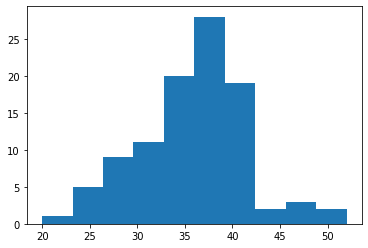

In [89]:
import matplotlib.pyplot as plt

plt.hist(last_error.sum().to_list()[1:], bins = 10)
plt.show()

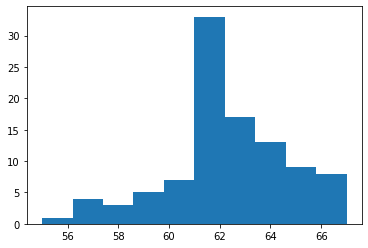

In [90]:
plt.hist(last_claimed.sum().to_list()[1:], bins = 10)
plt.show()

# Party list

,partyName,partyVote,seatsClaimed
0,กรีน,787785,2
1,ก้าวไกล,174586,0
2,ครูไทยเพื่อประชาชน,332088,0
3,คลองไทย,555213,1
4,ความหวังใหม่,386448,1
...,...,...,...
62,ไทยรวมไทย,577337,1
63,ไทยศรีวิไลย์,531651,1
64,ไทยสมาร์ท,570679,1
65,ไทยสร้างไทย,463836,1
